In [224]:
import konlpy

In [225]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [226]:
dic = pd.read_csv('./data/cleaning.csv',encoding = 'UTF-8-sig')
dic[:5]

,Column1,Column2,열1
0,https://zuminternet.github.io/Zum-Chrome-Exten...,크롬 확장프로그램 개발⛏️ 회고,NaN
1,https://www.twitch.tv/frog135,게구리 - Twitch,1.0
2,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5.0
3,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5.0
4,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1.0


In [227]:
dic.columns = ['url', 'title', 'label']
dic[:5]

,url,title,label
0,https://zuminternet.github.io/Zum-Chrome-Exten...,크롬 확장프로그램 개발⛏️ 회고,NaN
1,https://www.twitch.tv/frog135,게구리 - Twitch,1.0
2,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5.0
3,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5.0
4,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1.0


In [228]:
dic['domain'] = dic['url'].str.split('/').str[2]
dic[:5]

,url,title,label,domain
0,https://zuminternet.github.io/Zum-Chrome-Exten...,크롬 확장프로그램 개발⛏️ 회고,NaN,zuminternet.github.io
1,https://www.twitch.tv/frog135,게구리 - Twitch,1.0,www.twitch.tv
2,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5.0,docs.google.com
3,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5.0,docs.google.com
4,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1.0,www.twitch.tv


# 데이터 정리
labeling

import glob

input_file = r'.\data' # csv파일들이 있는 디렉토리 위치
output_file = r'.\data\history_data.csv' # 병합하고 저장하려는 파일명

allFile_list = glob.glob(os.path.join(input_file, '*history*.csv')) # glob함수로 sales_로 시작하는 파일들을 모은다
print(allFile_list)
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다
    

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
dataCombine.to_csv(output_file, index=False) # to_csv함수로 저장한다. 인데스를 빼려면 False로 설정

# dic = pd.read_csv(file, encoding = 'UTF-8-sig')
# dic.columns = ['url', 'title', 'timestamp']
# dic['label'] = -1

def labeling(file):#기사 내용 중 단어 선별하기
    pd.read csv
    etc = ['']    # 기타: 0
    ent = ['youtube', 'webtoon']    # 엔터테인먼트: 1
    prod = ['bank']   # 생산성 및 금융: 2
    sns = ['blog', 'news', 'facebook', 'instagram', 'twitter', 'tistory'] # 소셜: 3
    shop = ['shopping', 'store']    # 쇼핑 및 음식: 4
    doc = ['document', 'docs', 'pdf']  # 정보 및 문서: 5
    edu = ['exam', 'career']  #  자기계발: 6
    labels = [etc, ent, prod, sns, shop, doc, edu, car]

    for key in label for label in labels:
        pat = '*'+key+'*'
        if pat.search(str(x)):
            f['label'] = 1
        elif str(x).search(str(x)):
            f['label'] = 2
    for word in sns:
        if str(x).search(str(x)):
            f['label'] = 3
    for word in shop:
        if str(x).search(word):
            f['label'] = 4
    for word in doc:
        if f['url'].str.contains(word):
            f['label'] = 5
    for word in edu:
        if f['url'].str.contains(word):
            f['label'] = 6
    for word in car:
        if f['url'].str.contains(word):
            f['label'] = 7
    for word in etc:
        if f['url'].str.contains(word):
            f['label'] = 0
labeling('./data/history.csv')

In [229]:
data = dic[['url','title','label']]
data[:5]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   url     1595 non-null   object 
 1   title   1470 non-null   object 
 2   label   1278 non-null   float64
dtypes: float64(1), object(2)
memory usage: 101.7+ KB


In [230]:
print(len(data)) # 댓글 개수 출력
data = data.dropna(subset=['url'])
data = data.drop_duplicates(subset=['url'])
print(len(data)) # 댓글 개수 출력
data.info()

4333
1595
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595 entries, 0 to 1594
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   url     1595 non-null   object 
 1   title   1470 non-null   object 
 2   label   1278 non-null   float64
dtypes: float64(1), object(2)
memory usage: 49.8+ KB


<AxesSubplot:>

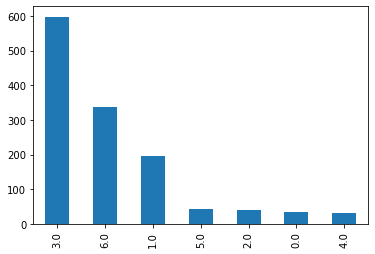

In [231]:
data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [232]:
url_data = data['url']
tit_data = data['title'].dropna()
y_data = data['label']
print('url 개수: {}'.format(len(url_data)))
print('title 개수: {}'.format(len(tit_data)))
print('label 개수: {}'.format(len(y_data)))

url 개수: 1595
title 개수: 1470
label 개수: 1595


# 불용어 제거 및 토큰화

In [233]:
kr_norm = []
eng_norm = []
for string in tit_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('kr title')
        break
    kr_norm.append(tokens)
for string in tit_data.tolist():
    try:
        tokens = re.sub("[^A-Za-z]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('eng title')
        break
    eng_norm.append(tokens)
for string in url_data.tolist():
    try:
        tokens = re.sub("[^A-Za-z]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('eng url')
        break
    eng_norm.append(tokens)

In [234]:
for sentence in zip(kr_norm, eng_norm):
    print(sentence)

퓨터 본체', ' ')
(' 만원 컴퓨터 어떤ㄱ요 컴퓨터 본체', ' ')
('위메프 월 일 판매 예정 컴퓨터 본체', ' jpg ')
('채굴 병신될때 컴퓨터사야함 컴퓨터 본체', ' ')
(' 긱 만에 판다고 올리니까 분만에 팔림 컴퓨터 본체', ' ')
('요즘 애새끼 씨빨년들은 왜캐 부모한테 바라는게 많음 컴퓨터 본체', ' ')
('글카 빼고 조립컴 맞추면 요즘 가격 싸나 컴퓨터 본체', ' ')
('델 완제품 케이스 이쁘넹 컴퓨터 본체', ' pc ')
('듀얼모니터 이거 고개안아픔 컴퓨터 본체', ' ')
(' 만에 사고 만에 팔았는데 ㄱㅊ 컴퓨터 본체', ' ')
('모니터 반짝거리는거 뭐가문제임 컴퓨터 본체', ' ')
('재밋는게 쓰면 스왑 졸라 많이한다 컴퓨터 본체', ' nvme ')
('친구 컴퓨터 견적 짜왔다 컴퓨터 본체', ' ')
('이제 시퓨는 무조건 암드냐 컴퓨터 본체', ' ')
('근데 전력효율 생각하면서 파워 사는 애들은 뭐하는 애들임 컴퓨터 본체', ' ')
('지금 선착순 명 에 판다 컴퓨터 본체', ' ')
(' 견적 봐주셈 컴퓨터 본체', ' ')
(' ㅣ발 세대 에 왤캐 쳐 시키냐 컴퓨터 본체', ' pc ie ssd ')
('귀여운 컴갤러 머리 쓰다듬어 주고 싶네 컴퓨터 본체', ' ')
('다이슨만아니엇어도 브가판돈으로 스위치샀는데 컴퓨터 본체', ' ')
(' 으로도 배그 상옵어려운대 컴퓨터 본체', ' ')
(' 년동안 컴터 대만 써온게 컴퓨터 본체', ' ')
(' 채굴 갤러리', 'asus tuf rtx o g ')
('근데 코어클럭은 왜 낮게주는거야 채굴 갤러리', ' ')
(' 념글보고 따라했는데 해쉬 따리 뭐노 채굴 갤러리', ' ')
(' 너무달아 채굴 갤러리', ' ')
('이더리움 예상 채굴량 계산 사이트 채굴 갤러리', ' ')
('이더마인 출금 기준 채굴 갤러리', ' ')
(' 세팅 좀 봐줘 채굴 갤러리', ' ')
(' ', 'google')
(' ', 'hof ai software r

In [235]:
kr_stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
eng_stopwords=['https','http','www','com','co','kr','org','ac']#불용어 제거하기

In [236]:
from konlpy.tag import Okt  
okt = Okt()

In [237]:
X_token=[]
for sentence in kr_norm:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in kr_stopwords] # 불용어 제거
    X_token.append(temp_X)

In [238]:
print(X_token[:3])
print(len(X_token))

[['크롬', '확장', '프로그램', '개발', '회고'], ['게', '구리'], ['시종', '설', '제안', '서']]


In [239]:
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [240]:
ps=PorterStemmer()

stop_words = set(stopwords.words('english'))

stemData=[]
for sentence in eng_norm:
    tokenData = nltk.word_tokenize(sentence)
    tempData = []
    for word in tokenData:  # 불용어 제거
        if word not in stop_words and word not in eng_stopwords:
            word = ps.stem(word)
            if len(word)>1:
                tempData.append(word)
    stemData.append(tempData)

In [241]:
print(X_token[:5])
print(len(X_token))
print(len(tempData))
temp = []
for n,m in zip(X_token,stemData):
    temp.append(n+m)
X_token = temp

[['크롬', '확장', '프로그램', '개발', '회고'], ['게', '구리'], ['시종', '설', '제안', '서'], ['시종', '설', '제안', '서'], []]
1470


In [242]:
print(X_token[:5])
print(len(X_token))

[['크롬', '확장', '프로그램', '개발', '회고'], ['게', '구리', 'twitch'], ['시종', '설', '제안', '서', 'googl', 'doc'], ['시종', '설', '제안', '서', 'googl', 'doc'], ['akaro', 'twitch']]
1470


# 정수 인코딩 수행

In [243]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [244]:
print(X_token[:3])
print(len(X_token))

[[413, 506, 116, 39, 1027], [135, 1028, 191], [40, 33, 48, 34, 6, 290]]
1470


In [245]:
word_to_index = tokenizer.word_index

In [246]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 2176


# 전체 데이터 길이 분포 확인

train data의 최대 길이 : 32
train data의 최소 길이 : 1
data의 평균 길이 : 6.306802721088435


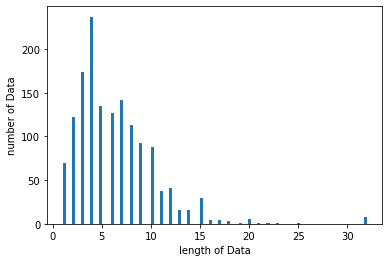

In [222]:
print('train data의 최대 길이 :',max(len(l) for l in X_token))
print('train data의 최소 길이 :',min(len(l) for l in X_token))
print('data의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [223]:
max_len = max(len(l) for l in X_token)
X_data = pad_sequences(X_token, maxlen=max_len)
print("X data shape: ", X_data.shape)
print("y data shape: ", y_data.shape)

X data shape:  (1470, 32)
y data shape:  (1595, 1)


In [219]:
y_data = np.array(y_data).reshape(-1, 1)

In [220]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  413
   506  116   39 1027]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  135 1028  191]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   40   33
    48   34    6  290]]
[[nan]
 [ 1.]
 [ 5.]]


# 데이터 분리

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

ValueError: Found input variables with inconsistent numbers of samples: [1470, 1595]

In [ ]:
print(X_train[:3])
print(y_train[:3]) 

# 모델 만들기(loss: 0. - acc: 0.)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# optimizer(adam -> sgd) 변경_실패

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)